In [ ]:
'''
test functionality of AsRadial() and AsAffine()
'''

In [1]:

import pymisca.tensorflow_extra as pytf;reload(pytf)
import tensorflow as tf
import numpy as np
import pymisca.vis_util as pyvis
sess = tf.InteractiveSession()
D = 2
udist = tf.contrib.distributions.Uniform(low=1.,high=3.)
    
odist = pytf.AsRadial(udist,D=D)
D = odist.bijector.D
loc=np.ones(D,dtype=np.float32)
scale_diag=np.array((0.01,1.,2.)[:D],dtype=np.float32)


def test__dist(m):
    X = m.sample(10000).eval()
    logP = m.log_prob(X).eval()
    print (logP.mean(),logP.std(),logP.flat[:10])
    pyvis.qc_2var(X.T[0],X.T[1])
    print(X.shape)
    return X


/home/shouldsee/.local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


is in ipython: 1
is in ipython: 1
[WARN] pymisca.vis_util cannot find network


(-2.5310245, 2.3841858e-07, array([-2.5310242, -2.5310242, -2.5310242, -2.5310242, -2.5310242,
       -2.5310242, -2.5310242, -2.5310242, -2.5310242, -2.5310242],
      dtype=float32))
(10000, 2)
[nan]


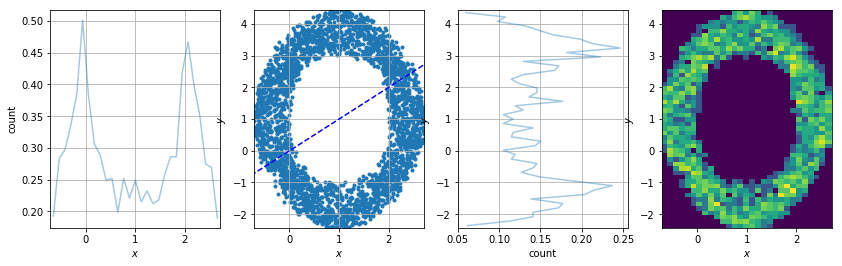

In [7]:
D = 2
odist = pytf.AsRadial(udist,D=D)
m = pytf.AffineTransformDiag(
    loc=np.ones(D,dtype=np.float32),
     scale_diag=np.array((1.,2.,2.)[:D],dtype=np.float32),
             distribution=odist,validate_args = True)
test__dist(m)
print (m.log_prob([[1.,1.,]]).eval())

In [14]:
# %pdb 0

Automatic pdb calling has been turned OFF


(-4.9870887, 0.1163272, array([-4.848215 , -5.005409 , -5.0761795, -4.9026623, -5.175333 ,
       -5.0485897, -4.9746857, -4.945396 , -4.972371 , -4.9638233],
      dtype=float32))
(10000, 3)


array([[ 1.6020485 , -1.2966082 ,  0.6358021 ],
       [ 0.02231419, -1.2051053 , -0.41355777],
       [ 3.2733822 ,  1.4120193 ,  3.9014919 ],
       ...,
       [ 3.5021653 , -0.1896509 ,  4.263851  ],
       [ 3.4237008 , -0.03706062,  3.3184562 ],
       [ 3.4716606 , -0.20022082,  4.1005917 ]], dtype=float32)

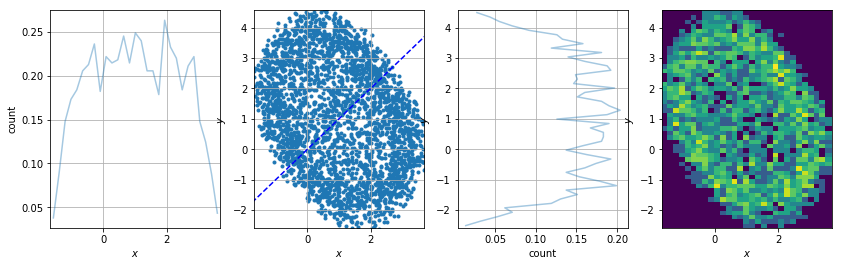

In [13]:
D = 3
odist = pytf.AsRadial(udist,D=D)
m = pytf.AffineTransformDiagPlusLowRank(
    loc=np.ones(D,dtype=np.float32),
     scale_diag=np.array((1.,2.,2.)[:D],dtype=np.float32),
    scale_perturb_factor = 5.* ( 0.5 - 
                                np.random.random(size=D).astype(np.float32)[:,None]
                               ),
             distribution=odist,validate_args = True)
test__dist(m)